### Блок теоретических вопросов

*Каково качество работы классификатора kNN при числе соседей равным единице на обучающей и тестовой выборках?*: 

1.	Качество на обучающей выборке максимальное, так как единственный сосед – это сам объект, тогда как на тестовой минимальное из-за переобучения.
2.	Качество на обучающей выборке минимальное, так как решающая поверхность становится негладкой из-за переобучения, но при этом идеально классифицирует тестовую выборку.
3.	Качество на обучающей и тестовой выборках минимальное из-за того, что модель переобучилась на единственном соседе.
4.	Качество на обучающей и тестовой выборках максимальное, так как ближайший сосед – это лучший прогноз для нового объекта.




**Ответ: 1)** В действительности, при обучении KNN запоминает соседей из трейна. Если взять один экземпляр оттуда в случае $k=1$, то прогноз сформируется за счет его же таргета. Поэтому модель переобучается.

___________________________________________

*Допустим у нас большое число соседей, и мы хотим взвешивать их по удаленности с помощью ядра. При каком размере парзеновского окна h дальние соседи будет иметь наименьший вес?*: 

1.	При размере окна, большем, чем расстояние до последнего соседа, тогда вес дальних соседей будет меньше единицы.
2.	При размере окна, равным единице дальние соседи будут иметь тот же вес, что и близкие, сделать их значимость меньше невозможно при использовании ядра.
3.	При размере окна, которое стремится к бесконечности, веса дальних соседей будут уменьшаться, так как расстояние в аргументе ядра будет делиться на все большее число.
4.	При размере окна, которое стремится к нулю, веса дальних соседей также стремятся к нулю, тогда как близкие соседи становятся все более значимыми



**Ответ: 4)** Можно показать чисто математически, но так же рассуждали об этом на практике, экспериментируя с параметром ширины окна $h$.

___________________________________________

*Основным недостатком метода kNN является*: 

1.	Невозможность гибкой настройки обучения или модификации метода, единственный гиперпараметр – это число соседей.
2.	При разном масштабе признаков kNN не может быть применён.
3.	Метод kNN может работать только с Евклидовой метрикой.
4.	Долгое время предсказания на больших выборках или при проклятии размерности.



**Ответ: 4)** Пояснения по каждому пункту:

1. у kNN существует множество модификаций, мы уже знаем, что можно использовать различные ядра, например, Гауссово ядро, у которого есть свой настраиваемый параметр ширины окна. 
2. Проблема разных масштабов у признаков просто решается нормировкой данных или использованием взвешенной метрики. 
3. Нет, можно использовать, например, расстояние Минковского.
4. Долгий подсчет расстояний действительно затрудняет использование метода на практике, но все же эта проблема частично решается с помощью более продвинутых алгоритмов (locality-sensitivity hashing).

___________________________________________

### Блок практики

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib
matplotlib.rcParams['figure.figsize'] = (12, 8)

import warnings
warnings.filterwarnings('ignore')

# k Nearest Neighbors (kNN)
Метод k ближайших соседей рассчитывает расстояния от нового объекта до всех объектов выборки и, отбирая k ближайших, предсказывает целевую переменную с помощью голосования (в случае классификации) или усреднения (в случае регрессии). \
При этом этот метод можно по-разному настраивать, например можно изменить способ подсчета расстояний или способ взвешивания соседей по расстоянию. \
Для начала скачаем датасет и визуализируем данные.

In [10]:
### Загрузим датасет

circ = pd.read_csv('concertriccir2.csv')
circ.head()

,X,Y,class
0,0.70,-0.247,0.0
1,-3.95,2.740,1.0
2,0.15,-2.160,1.0
3,-1.67,-0.942,1.0
4,2.56,-1.850,1.0


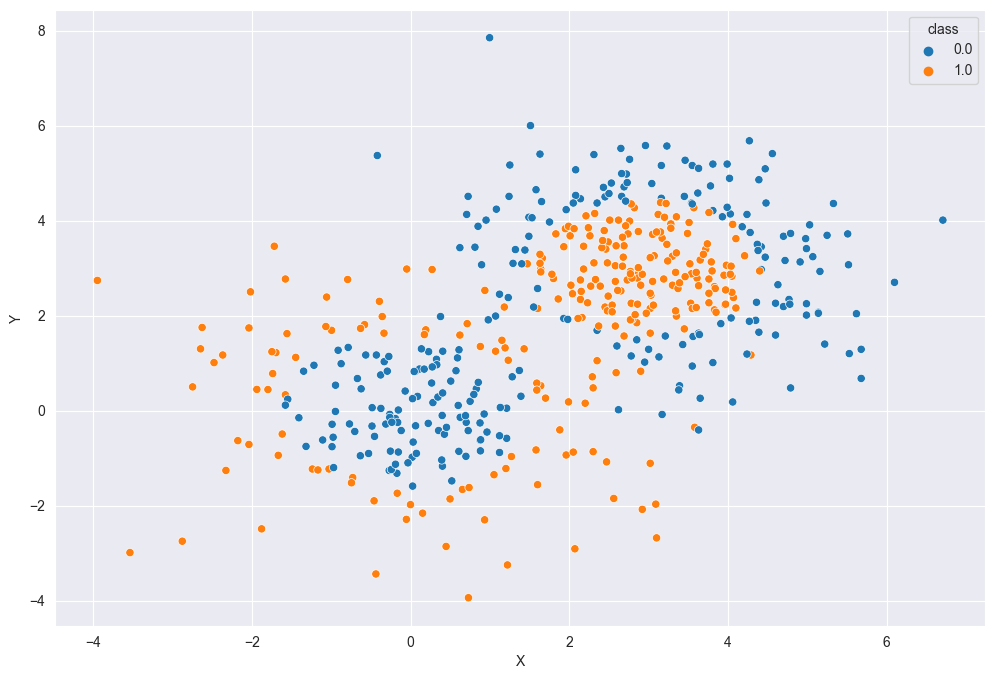

In [11]:
### Изобразим данные

sns.scatterplot(x=circ['X'], y=circ['Y'], hue=circ['class']);

**Задание 1.** Обучите логистическую регрессию на данных и нарисуйте разделяюущую гиперплоскость (прямую) на рисунке с данными. Как линейный классификатор справился с задачей? Сделайте вывод исходя из геометрии данных и линии разделения. Какой accuracy выйдет на всей выборке (без валидации) (2б)?

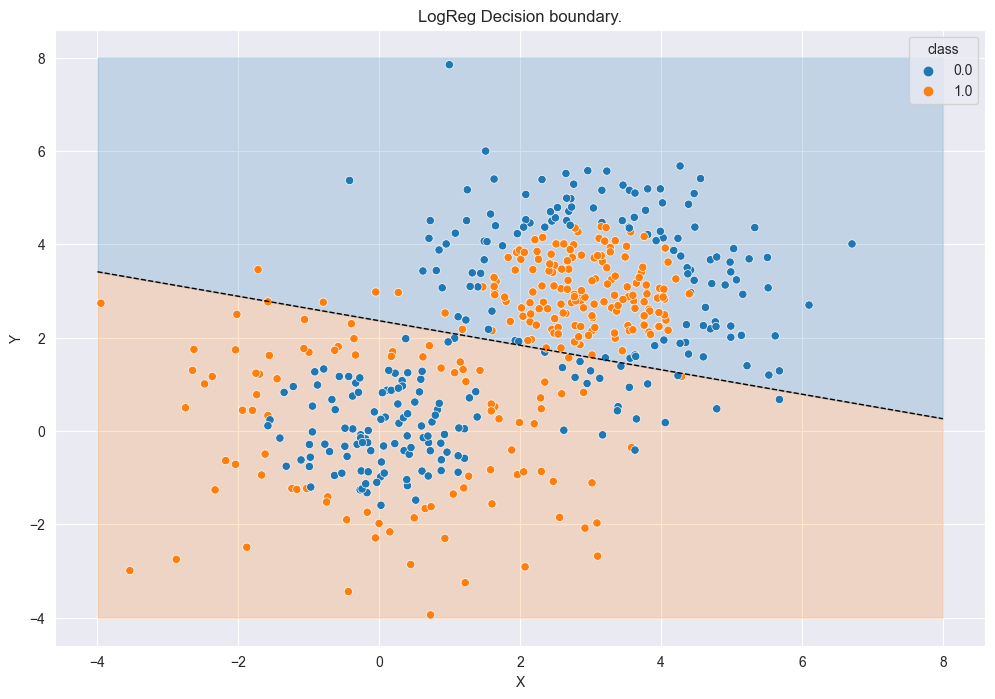

In [12]:
from sklearn.linear_model import LogisticRegression

### Обучим меодель

logit = LogisticRegression()
logit.fit(circ[['X', 'Y']], circ['class'])

### Достанем свободный коэффициент из уравнения получившейся гиперплоскости
b = logit.intercept_[0]

### Достанем веса возле каждый фичи из уравнения получившейся гиперплоскости
w1, w2 = logit.coef_.T

### Представим эту плоскость в виде уравнения y = m * x + c
### Для этого расчитаем их следующим образом:
c = -b/w2
m = -w1/w2

### Нагенерим точек для изображения этой прямой y = m * x + c
xd = np.array([-4, 8])
yd = m*xd + c

### Нанесем все на график с помощью pyplot
plt.plot(xd, yd, 'k', lw=1, ls='--')
plt.fill_between(xd, yd, 8, color='tab:blue', alpha=0.2)
plt.fill_between(xd, yd, -4, color='tab:orange', alpha=0.2)

plt.title('LogReg Decision boundary.')
sns.scatterplot(x=circ['X'], y=circ['Y'], hue=circ['class']);

In [13]:
### Замерим accuracy

logit.score(circ[['X', 'Y']], circ['class'])

0.424

**Задание 2.** Разделите обучающую выборку и обучите 6 моделей kNN с различным числом соседей из `all_k`, сохраните обученные классификаторы в список. \
Выведите accuracy на тренировочной и тестовой выборке для каждой модели. Каково оптимальное число соседей с точки зрения accuracy? (2б)

In [14]:
### Разделим выборку

X = circ[['X', 'Y']].values
y = circ['class'].values.astype('int')

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    shuffle=True, random_state=2022)

In [15]:
from sklearn.neighbors import KNeighborsClassifier
all_k = [1, 3, 10, 30, 40, 60]

### Обучим классификаторы и замерим в каждом из случаев качество 

all_clfs, acc_test, acc_train = [], [], []

for k in all_k:
    clf = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
    all_clfs.append(clf)
    
    acc_train.append(np.mean(clf.predict(X_train) == y_train))
    acc_test.append(np.mean(clf.predict(X_test) == y_test))
all_clfs

[KNeighborsClassifier(n_neighbors=1),
 KNeighborsClassifier(n_neighbors=3),
 KNeighborsClassifier(n_neighbors=10),
 KNeighborsClassifier(n_neighbors=30),
 KNeighborsClassifier(n_neighbors=40),
 KNeighborsClassifier(n_neighbors=60)]

In [16]:
### Результат в виде матрицы

pd.DataFrame({'k' : all_k,
              'ACC Train' : acc_train,
              'ACC Test' : acc_test})

,k,ACC Train,ACC Test
0,1,1.0000,0.89
1,3,0.9475,0.87
2,10,0.9150,0.85
3,30,0.8525,0.74
4,40,0.8000,0.75
5,60,0.6925,0.73


**Задание 3.** (БОНУС! БЕЗ БАЛЛОВ И ЧЕКЕРОВ!) Скачайте библиотку [mlxtend](http://rasbt.github.io/mlxtend/#examples) для визуализации решающих поверхностей. 
В документации можно ознакомиться с [примерами](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) изображения решающих поверхностей для различных моделей. \
Построим несколько таких графиков для шести обученных нами kNN.

1. Подберите параметры `gridspec.GridSpec()` и `itertools.product()` для нашего числа классификаторов. 
2. Удобно перед визулизацией сохранить обученные классификаторы в список `all_clfs`.
3. Проявите терпение! Отрисовка решающих поверхностей может занимать пару минут.

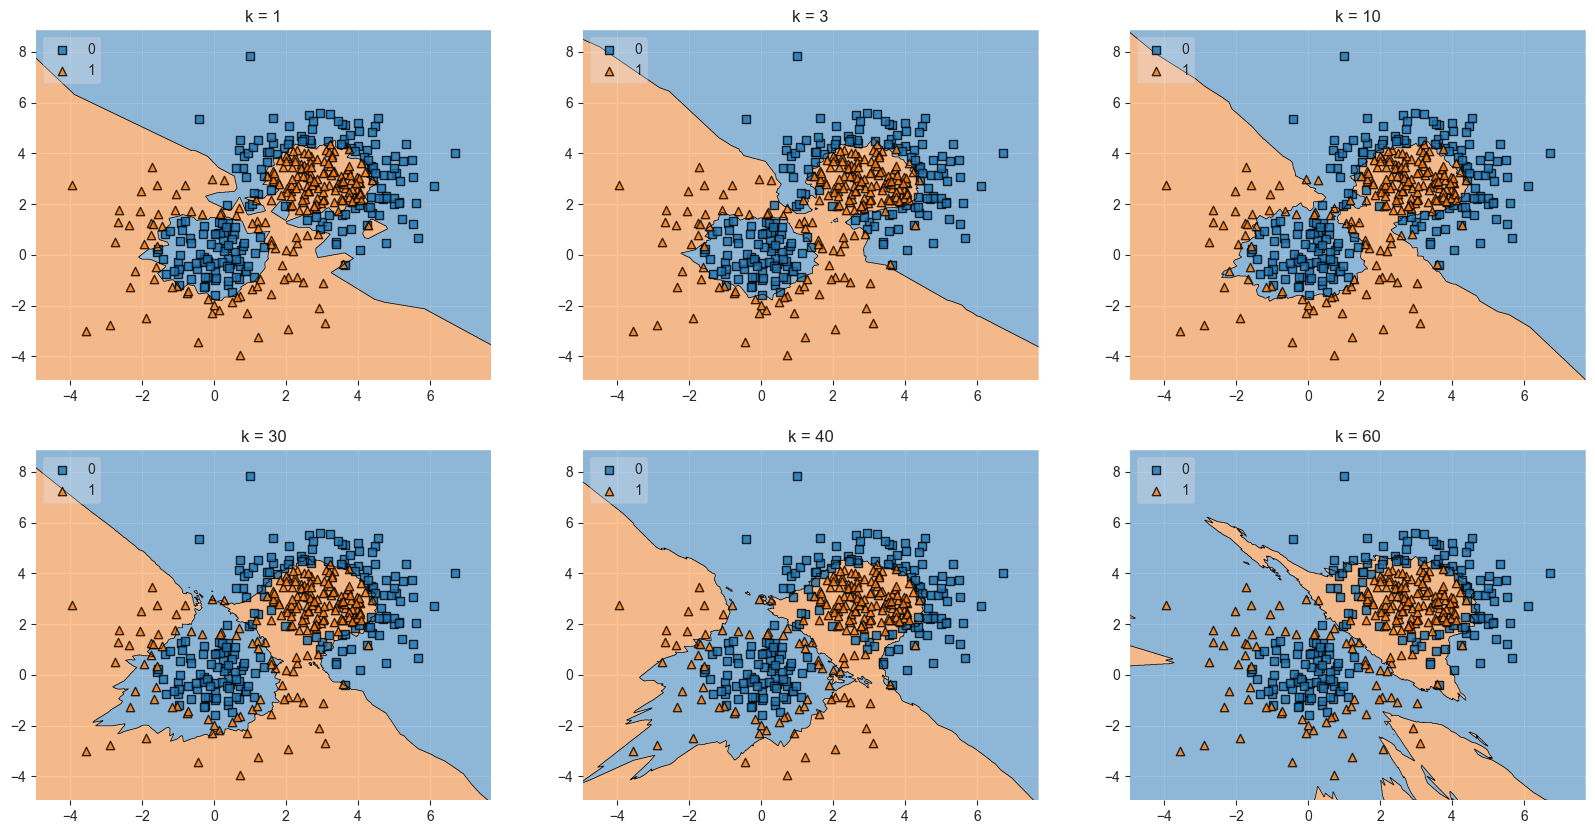

In [18]:
import mlxtend
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools


gs = gridspec.GridSpec(2, 3)
fig = plt.figure(figsize=(20,10))

labels = ['k = 1', 'k = 3', 'k = 10', 'k = 30', 'k = 40', 'k = 60']
for clf, lab, grd in zip(all_clfs,
                         labels,
                         itertools.product([0, 1], [0, 1, 2])):
    ax = plt.subplot(gs[grd])
    fig = plot_decision_regions(X_train, y_train, clf=clf, legend=2)
    plt.title(lab)
plt.show()

1. Как меняется решающая поверхность с ростом числа соседей?
2. Какое оптимальное число соседей с точки зрения устройства данных и геометрии решающих поверхностей? Поясните свой ответ, опираясь на полученные графики.
3. Лучше ли справляется kNN по сравнению с логистической регрессией?

**Задание 4.** Скачайте уже известный вам датасет [SigmaCabs](https://www.kaggle.com/datasets/arashnic/taxi-pricing-with-mobility-analytics). Обучите классификатор kNN на отнормированных и не отнормированных данных, подобрав лучшие гиперпараметры среди $k \in [1, 5, 10]$. Замерьте качество на тестовой выборке. \
Почему нормирование данных помогает улучшить качество?

-- Потому что учитывают масштаб фичей при расчете растояний

(4б)

In [ ]:
df = pd.read_csv('processed_sigma_cabs.csv')
df.head()

X = df.drop('Surge_Pricing_Type', axis=1)
y = df['Surge_Pricing_Type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    shuffle=True, random_state=2022)

%%time
all_k = [1, 5, 10]
acc_test = []

for k in all_k:
    clf = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
    acc_test.append(np.mean(clf.predict(X_test) == y_test))
    
pd.DataFrame({'k' : all_k,
              'ACC Test' : acc_test})

In [ ]:
### Теперь на отнормированных данных

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
Xsc_train = scaler.fit_transform(X_train)
Xsc_test = scaler.transform(X_test)

%%time
all_k = [1, 5, 10]
acc_test = []

for k in all_k:
    clf = KNeighborsClassifier(n_neighbors=k).fit(Xsc_train, y_train)
    acc_test.append(np.mean(clf.predict(Xsc_test) == y_test))
    
pd.DataFrame({'k' : all_k,
              'ACC Test' : acc_test})

**Задание 5.** Обучите классификатор kNN на отнормированных данных с помощью метрики Минковского. 
$$
\rho(x, z) = \bigg(\sum_i |x_i - z_i|^p\bigg) ^{1/p}
$$

Значение параметра `p` возьмите равным единице. Замерьте качество на тестовой выборке и сравните с предыдущим заданием, где `p = 2`. (2б)

In [ ]:
%%time
clf = KNeighborsClassifier(n_neighbors=10, 
                           metric='minkowski',   ### <- указываем метрику Минковского
                           p=1).fit(Xsc_train, y_train)

print(f'ACC Test, (p = 1): {np.mean(clf.predict(Xsc_test) == y_test)}')

**Задание 6.** Скачайте датасет [California Housing Prices](https://www.kaggle.com/datasets/camnugent/california-housing-prices), в котором мы будем предсказывать среднюю стоимость жилья. В качестве признаков будем использовать `['longitude', 'latitude']`, посмотрите на них с помощью scatterplot. \
По какой характеристике наш kNN регрессор в этом случае подбирает соседей?

1. Обучите обыкновенную линейную регрессию и замерьте RMSE на тренировочной и тестовой выборках.
2. Обучите kNN регрессор на отнормированных данных, подобрав лучшие гиперпараметры. 
3. Обучите kNN регрессор с гауссовским ядром, подобрав оптимальное значение ширины окна среди предложенных $h \in np.arange(0.02, 0.1, 0.01)$.

Как ширина окна влияет на веса при усреднении ответа по соседям? 

(6б)

In [ ]:
### Загрузим данные и разобьем выборку

df = pd.read_csv('housing.csv')
df.head()

X = df[['longitude', 'latitude']] # df.drop(['ocean_proximity', 'median_house_value'], axis=1)
y = df['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    shuffle=True, random_state=2022)
sns.scatterplot('longitude', 'latitude', data=X, hue=y);

In [ ]:
### Отнормируем

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
### Замерим базовое качество Линейной Регрессии

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

lr = LinearRegression().fit(X_train, y_train)
print(f'Linreg Train RMSE: {mean_squared_error(y_train, lr.predict(X_train), squared=False).round(2)}')
print(f'Linreg Test RMSE: {mean_squared_error(y_test, lr.predict(X_test), squared=False).round(2)}')

In [ ]:
### Пробежимся по различным k

all_k = np.arange(1, 10)
rmse_test, rmse_train = [], []

for k in all_k:
    clf = KNeighborsRegressor(n_neighbors=k).fit(X_train, y_train)
    
    rmse_train.append(mean_squared_error(y_train, clf.predict(X_train), squared=False).round(2))
    rmse_test.append(mean_squared_error(y_test, clf.predict(X_test), squared=False).round(2))
    
pd.DataFrame({'k' : all_k,
              'RMSE Train' : rmse_train,
              'RMSE Test' : rmse_test})

In [ ]:
### Замерим, как меняется качество на трейне и на тесте
### При разной ширине окна в случае Гаусова Ядра

rmse_test, rmse_train = [], []

for h in np.arange(0.02, 0.1, 0.01):
    def gaussian_kernel(distances, h=h):
        return np.exp(- distances**2 / h**2)
    
    knn = KNeighborsRegressor(n_neighbors=7, weights=gaussian_kernel)
    knn.fit(X_train, y_train)
    
    rmse_train.append(mean_squared_error(y_train, knn.predict(X_train), squared=False).round(2))
    rmse_test.append(mean_squared_error(y_test, knn.predict(X_test), squared=False).round(2))
    
    
pd.DataFrame({'h' : np.arange(0.02, 0.1, 0.01),
              'RMSE Train' : rmse_train,
              'RMSE Test' : rmse_test})